# Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import data

In [3]:
dataset = pd.read_csv('preprocessed_data_single.csv')
dataset.head()

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,ax,ay,az,...,vz0,x,x0,y,z0,pfx_x,pfx_z,nasty,pitch_type,pitcher_id
0,-0.503,2.362,92.1,84.7,2846.597,212.661,47.1,-14.259,29.317,-9.931,...,-9.057,136.17,-2.103,175.01,6.471,-7.77,12.08,52.0,FF,434378
1,-0.412,1.298,92.0,84.6,2753.243,216.794,44.1,-15.256,29.390,-11.777,...,-11.253,132.70,-2.004,203.73,6.387,-8.37,11.15,53.0,FF,434378
2,-0.227,1.667,84.7,78.7,2411.167,241.408,35.2,-18.069,23.376,-22.326,...,-7.013,125.65,-2.092,193.77,6.388,-11.57,6.26,37.0,CH,434378
3,-1.342,3.408,92.5,85.8,2366.659,221.683,39.3,-14.692,27.006,-15.675,...,-5.603,168.15,-2.181,146.76,6.584,-7.84,8.76,51.0,FF,434378
4,-1.164,2.798,92.8,85.5,2628.442,215.150,43.6,-14.156,29.133,-12.070,...,-7.788,161.37,-2.109,163.23,6.541,-7.57,10.72,52.0,FF,434378


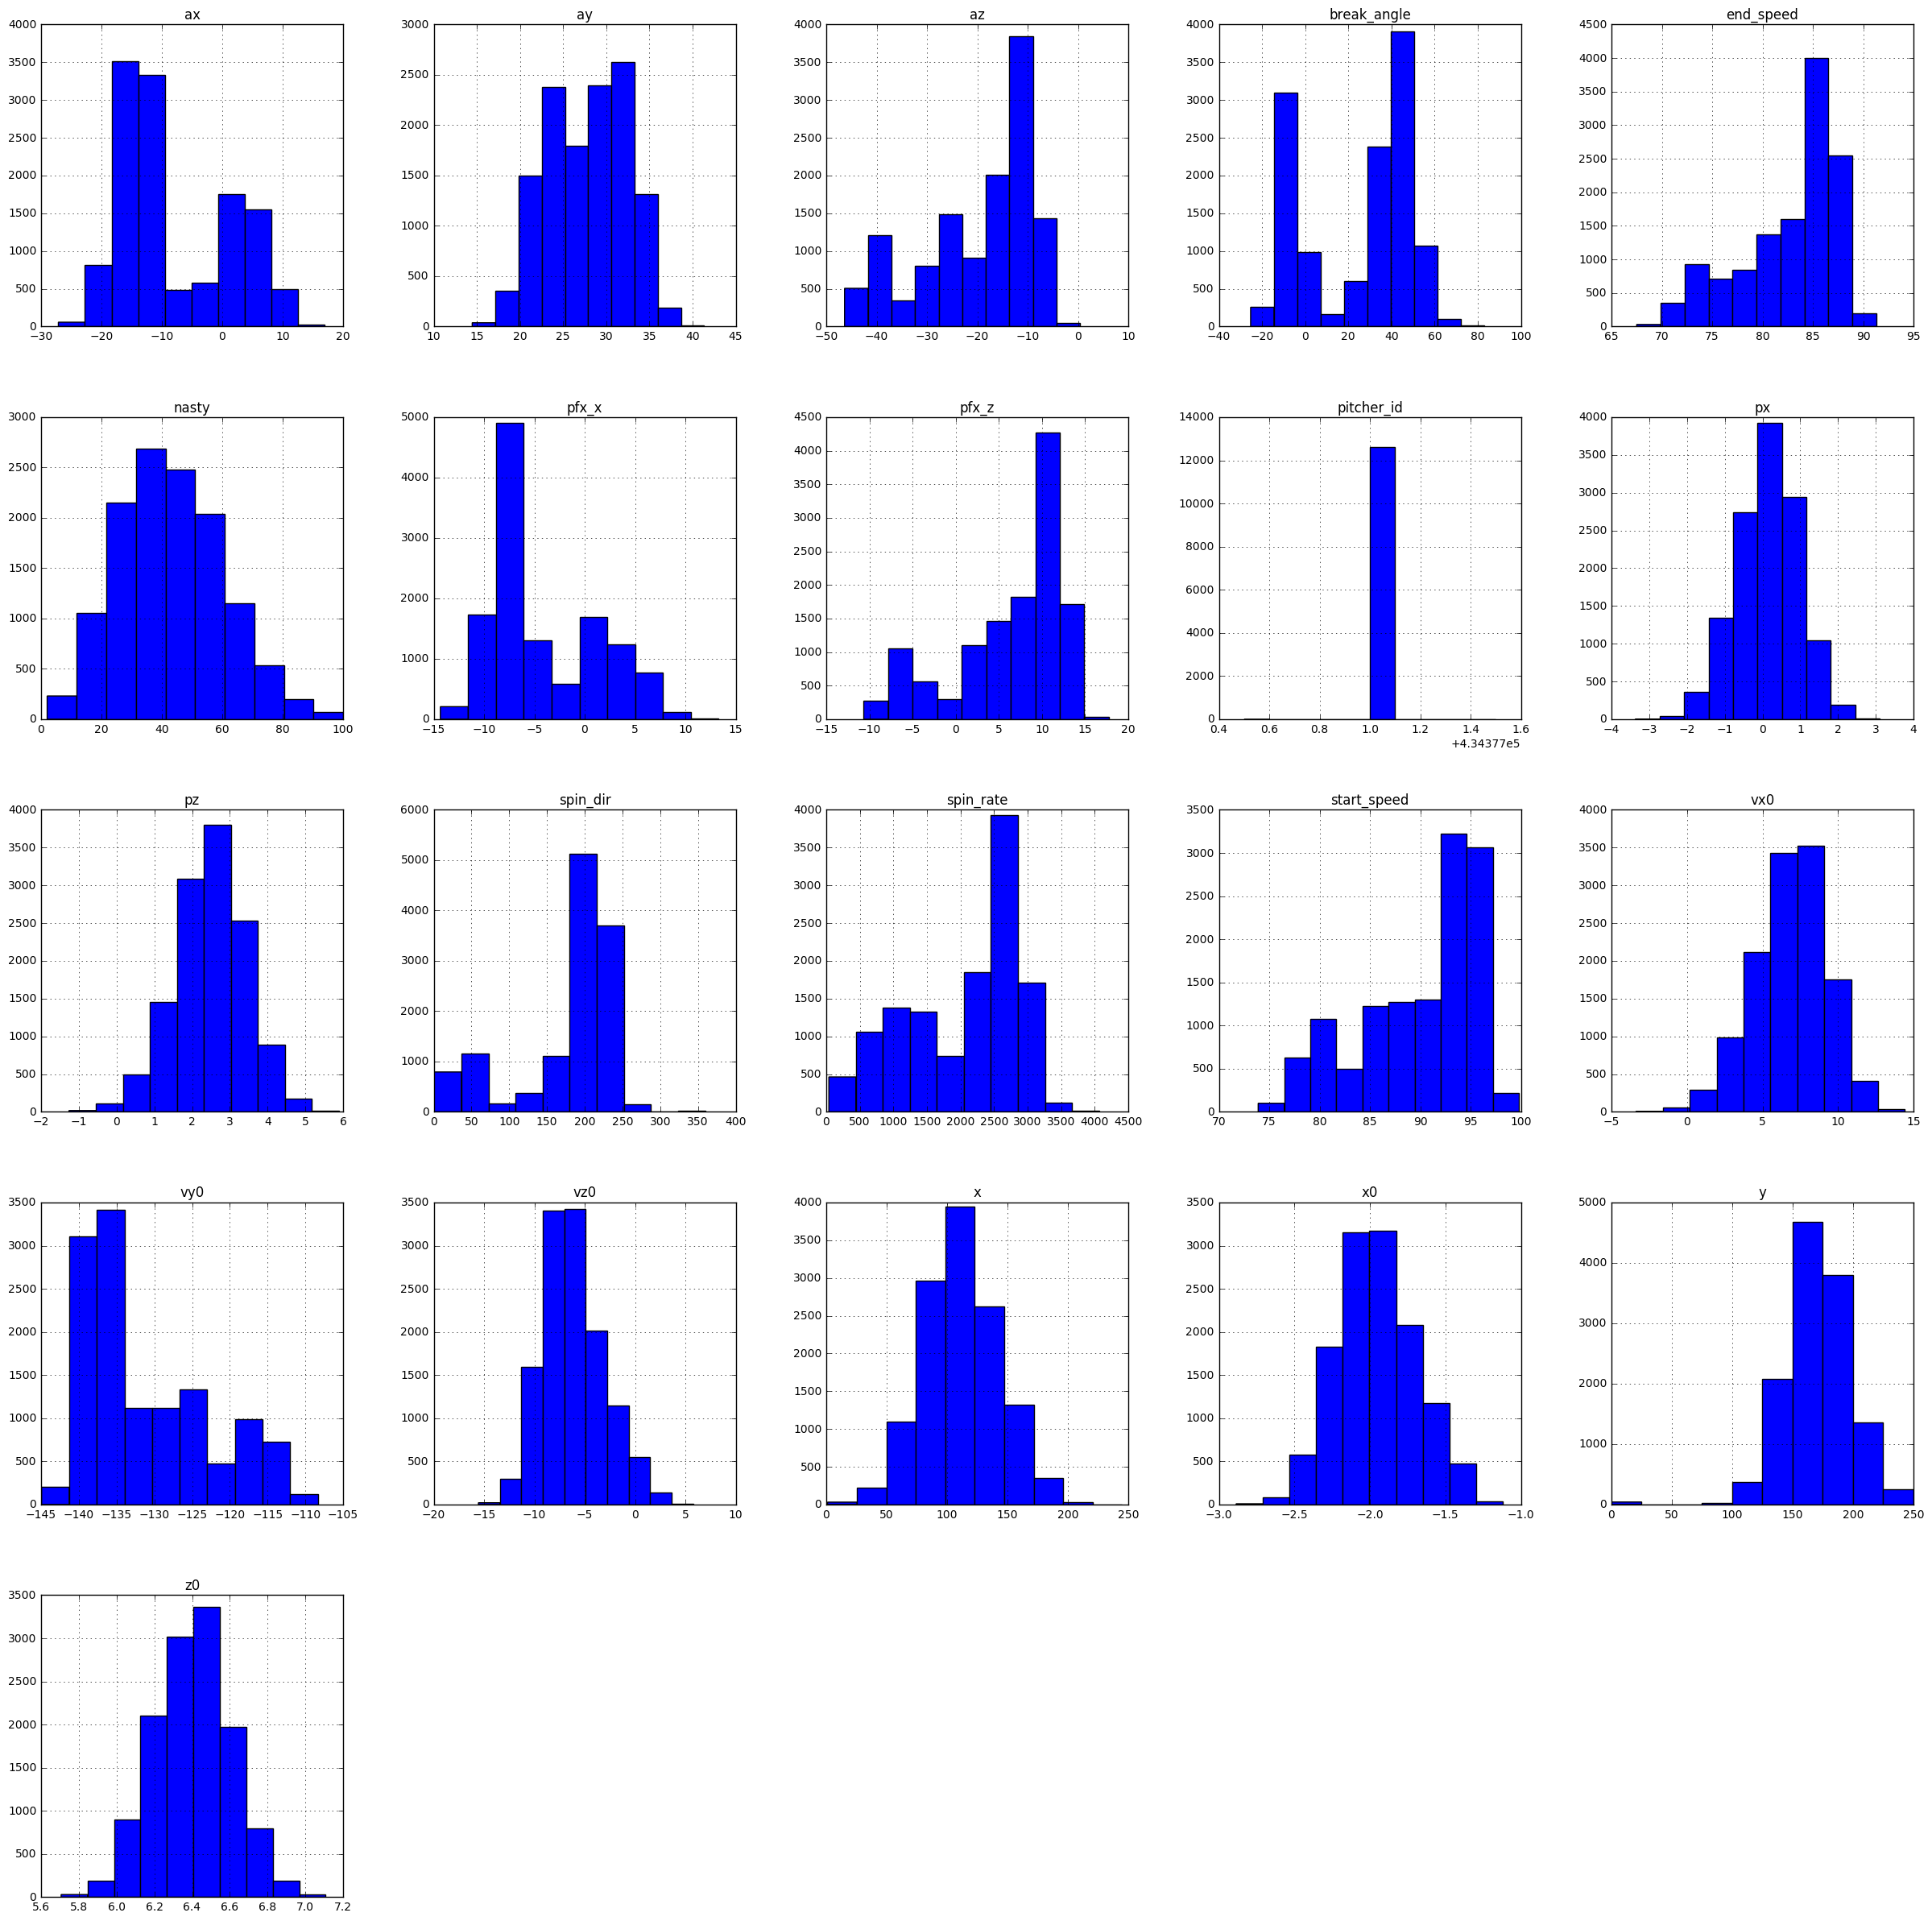

In [4]:
#Visualize by histogram
dataset.hist(figsize= (30,30))
plt.show()

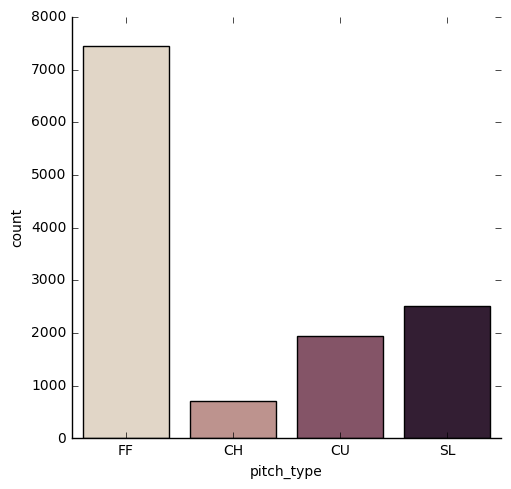

In [5]:
#Visualize pitch type
import seaborn as sns
sns.catplot(x="pitch_type", kind="count", palette="ch:.25", data=dataset);
plt.show()

In [6]:
# Import ependent Variable
X = dataset.iloc[:, 0:19].values

In [7]:
# Import Dependent Variable
#y = dataset.iloc[0:100000, 29].values
y = dataset.iloc[0:, 20].values

# Encoding the Dependent Variable
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

#convert y into binary format
import keras
from keras.utils import to_categorical
y_binary = to_categorical(y)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array
Using TensorFlow backend.


In [8]:

keys = labelencoder_y.classes_
values = labelencoder_y.transform(labelencoder_y.classes_)
dictionary = dict(zip(keys, values))
print(dictionary)

{'CU': 1, 'CH': 0, 'SL': 3, 'FF': 2}


# Split data into trainning set and test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size = 0.2)

In [10]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
# Importing the Keras libraries and packages
#import keras
import tensorflow as tf
from keras import metrics
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation


In [20]:
#Initilize ANN
classifier = Sequential()

#Add input layer and fitst hidden layer
classifier.add(Dense(50, activation='relu', kernel_initializer='uniform', input_dim = 19))


#Add second hidden layer
classifier.add(Dense(50, activation='relu', kernel_initializer='uniform'))

#Add oupt layer
#classifier.add(Dense(10, activation = tf.nn.softmax, kernel_initializer='uniform'))
classifier.add(Dense(4, activation = tf.nn.softmax, kernel_initializer='uniform'))

#compiling ANN
#classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [metrics.categorical_accuracy])

sgd = keras.optimizers.SGD(0.005, momentum=0.0, nesterov=False)
classifier.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['categorical_accuracy'])

# Fitting the ANN to the Training set
model = classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 20, validation_split=0.1)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 9071 samples, validate on 1008 samples
Epoch 1/20
9071/9071 [==============================] - 1s 137us/step - loss: 1.1796 - categorical_accuracy: 0.5894 - val_loss: 1.0571 - val_categorical_accuracy: 0.5873
Epoch 2/20
9071/9071 [==============================] - 1s 132us/step - loss: 0.7398 - categorical_accuracy: 0.6723 - val_loss: 0.4375 - val_categorical_accuracy: 0.7738
Epoch 3/20
9071/9071 [==============================] - 1s 120us/step - loss: 0.3735 - categorical_accuracy: 0.8356 - val_loss: 0.3374 - val_categorical_accuracy: 0.9028
Epoch 4/20
9071/9071 [==============================] - 1s 121us/step - loss: 0.2960 - categorical_accuracy: 0.9109 - val_loss: 0.2625 - val_categorical_accuracy: 0.9266
Epoch 5/20
9071/9071 [==============================] - 1s 121us/step - loss: 0.2184 - categorical_accuracy: 0.9322 - val_loss: 0.1873 - val_categorical_accuracy: 0.9335
Epoch 6/20
9071/9071 [==============================] - 1s 119us/step - loss: 0.1520 - categorical_acc

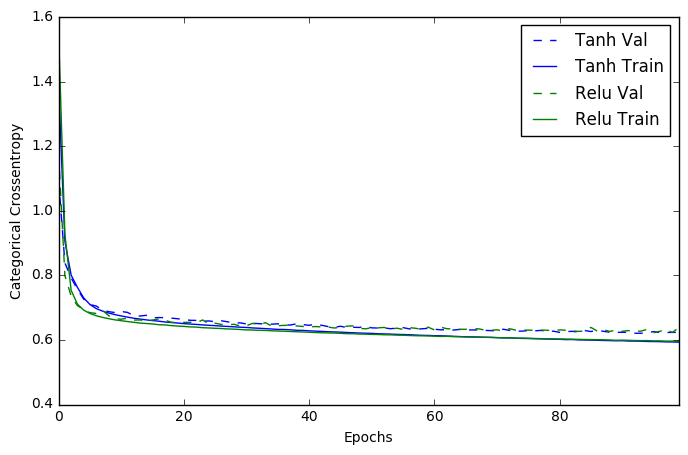

In [26]:
def plot_history(histories, key='categorical_crossentropy'):
  plt.figure(figsize=(8,5))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_loss'],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history['loss'], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('tanh', model),
              ('relu', model_small)])

plt.show()

In [15]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.savetxt("cm.csv", cm, delimiter=",")

Normalized confusion matrix
[[  9.92805755e-01   0.00000000e+00   7.19424460e-03   0.00000000e+00]
 [  0.00000000e+00   9.94594595e-01   0.00000000e+00   5.40540541e-03]
 [  0.00000000e+00   0.00000000e+00   9.99332889e-01   6.67111408e-04]
 [  0.00000000e+00   1.17187500e-02   1.17187500e-02   9.76562500e-01]]


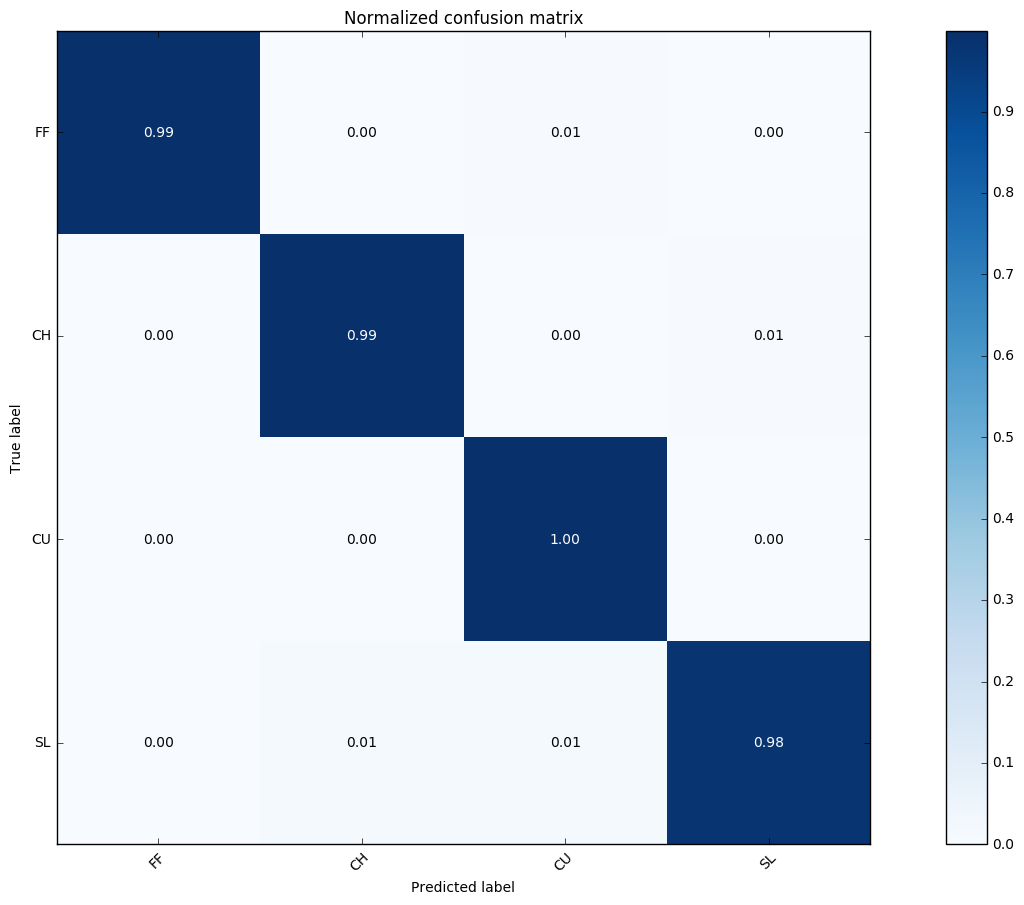

In [18]:
# Plot non-normalized confusion matrix

class_names = dataset['pitch_type'].unique()

#Visualize CM
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.set_size_inches(19.5, 10.5)
    #fig.tight_layout()
    return ax




#class_names = dataset['CH', 'CU', 'FC', 'FF', 'FS', 'FT', 'KC', 'KN', 'SI', 'SL']
#plot_confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), classes=class_names, title='Confusion matrix, without normalization')
plot_confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), classes=class_names, normalize=True,title='Normalized confusion matrix')
plt.show()

In [19]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)


from sklearn.metrics import classification_report
target_names = ['CH', 'CU','FF', 'SL']

#{'CU': 1, 'CH': 0, 'SL': 3, 'FF': 2}


class_report = classification_report(y_test, y_pred, target_names=target_names)
#class_report = classification_report(y_test, y_pred)

print (class_report)

              precision    recall  f1-score   support

          CH       1.00      0.99      1.00       139
          CU       0.98      0.99      0.99       370
          FF       1.00      1.00      1.00      1499
          SL       0.99      0.98      0.99       512

   micro avg       0.99      0.99      0.99      2520
   macro avg       0.99      0.99      0.99      2520
weighted avg       0.99      0.99      0.99      2520
 samples avg       0.99      0.99      0.99      2520



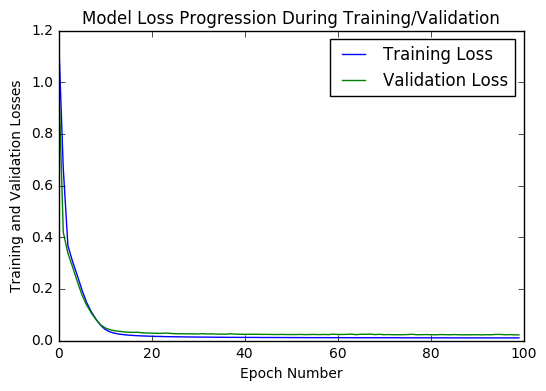

In [13]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])

plt.show()

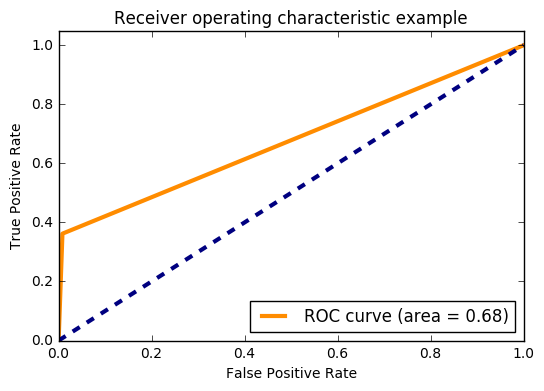

In [24]:
n_classes = y_test.shape[1]

# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


# Compute macro-average ROC curve and ROC area
from itertools import cycle
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


plt.figure()
lw = 3
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()



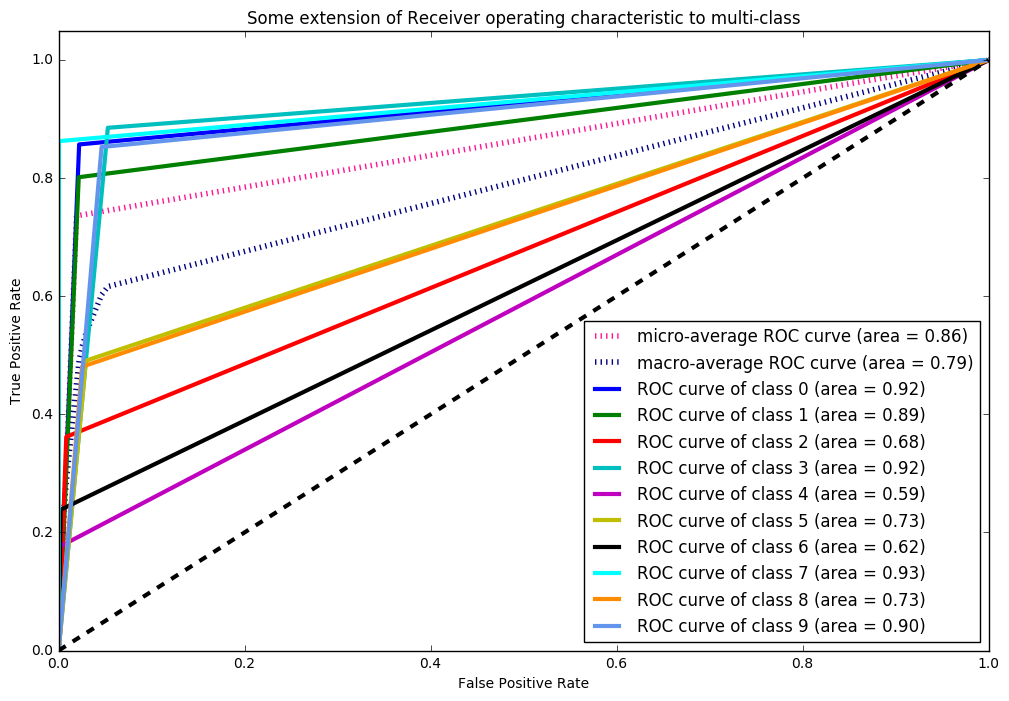

In [27]:
# Compute macro-average ROC curve and ROC area
from itertools import cycle
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(12, 8))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['b', 'g', 'r', 'c', 'm', 'y', 'k', 'aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Compute micro-average ROC curve and ROC area
thresholds = dict()
fpr["micro"], tpr["micro"], thresholds["micro"] = metrics.roc_curve(y_test.ravel(), y_pred.ravel(),pos_label=2)
print(fpr)
print(tpr)
print(thresholds)

In [26]:
#Visualize CM
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.set_size_inches(19.5, 10.5)
    #fig.tight_layout()
    return ax